# Loan Detection 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# import the data

In [2]:
# load the data 

df = pd.read_csv('dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df['Credit_History'].value_counts()
df['Married'].value_counts()
df['Dependents'].value_counts()
df['Education'].value_counts()
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# check missing values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Encode the Data with Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df['Gender'] = le.fit_transform(df['Gender'])
# df['Married'] = le.fit_transform(df['Married'])
# df['Dependents'] = le.fit_transform(df['Dependents'])
# df['Education'] = le.fit_transform(df['Education'])
# df['Property_Area'] = le.fit_transform(df['Property_Area'])
# df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])
# df['Self_Employed'] = le.fit_transform(df['Self_Employed'])


In [8]:
# Encode values manually conveet categorical to numerical

df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Dependents'] = df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
df['Property_Area'] = df['Property_Area'].map({'Urban':1,'Semiurban':2,'Rural':3})


df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1


In [9]:
df['Married'].value_counts()
df['Credit_History'].value_counts()
df['Dependents'].value_counts()
df['Education'].value_counts()
df['Self_Employed'].value_counts()

Self_Employed
0.0    500
1.0     82
Name: count, dtype: int64

In [10]:
# Deal with missing values Simple Impueter
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# df['LoanAmount'] = imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))
# df['Loan_Amount_Term'] = imputer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
# df['ApplicantIncome'] = imputer.fit_transform(df['ApplicantIncome'].values.reshape(-1,1))
# df['CoapplicantIncome'] = imputer.fit_transform(df['CoapplicantIncome'].values.reshape(-1,1))
# df['Credit_History'] = imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))
# df.head()


In [11]:
# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.isnull().sum()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14436\4049813976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14436\4049813976.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df['Dependents'].value_counts()

Dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64

# Data Visualization

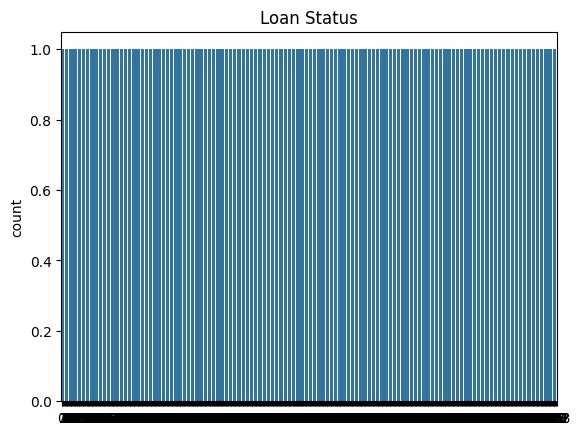

In [15]:
# data visualization
sns.countplot(df['Loan_Status'])
plt.title('Loan Status')
plt.show()

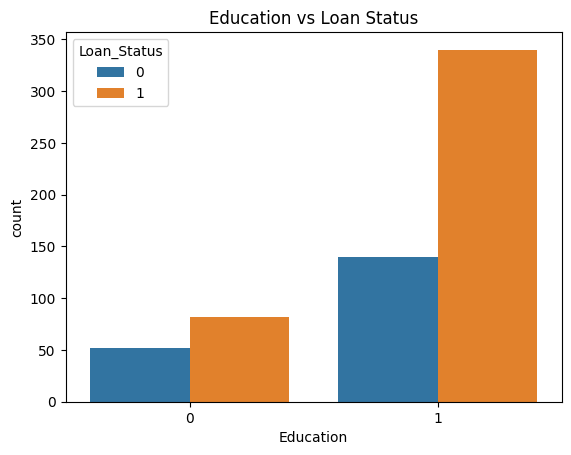

In [16]:
# education & loan status visualization
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')
plt.show()


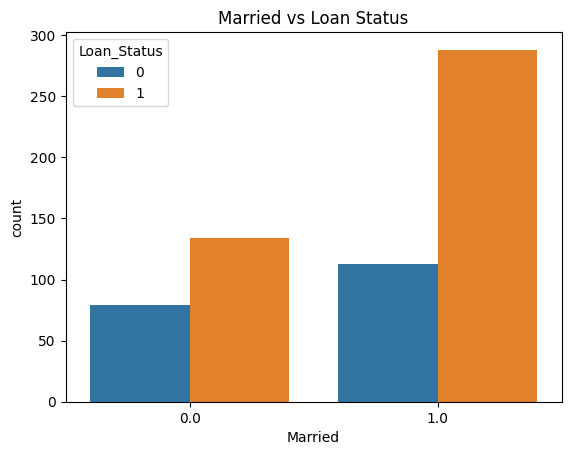

In [ ]:
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Married vs Loan Status')
plt.show()

In [ ]:
# # drop the row where married = 2 
# df = df[df['Married'] != 2]
# df['Married'].value_counts()

Married
1.0    401
0.0    213
Name: count, dtype: int64

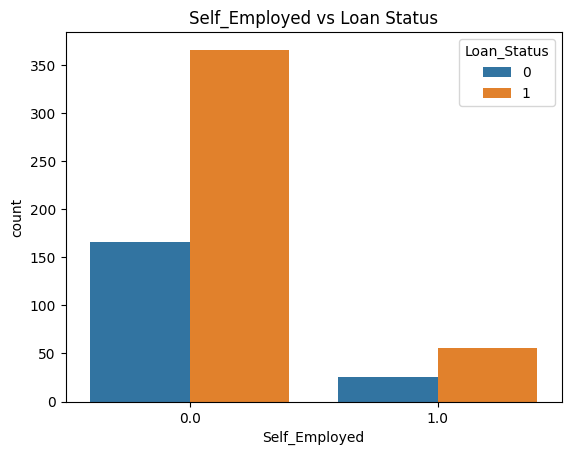

In [ ]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Self_Employed vs Loan Status')
plt.show()

In [20]:
df['Self_Employed'].value_counts()

Self_Employed
0.0    532
1.0     82
Name: count, dtype: int64

In [ ]:
# convert the data to 1 where Self_Employed = 2
# df['Self_Employed'] = df['Self_Employed'].replace(2,1)
# df['Self_Employed'].value_counts()

Self_Employed
0.0    532
1.0     82
Name: count, dtype: int64

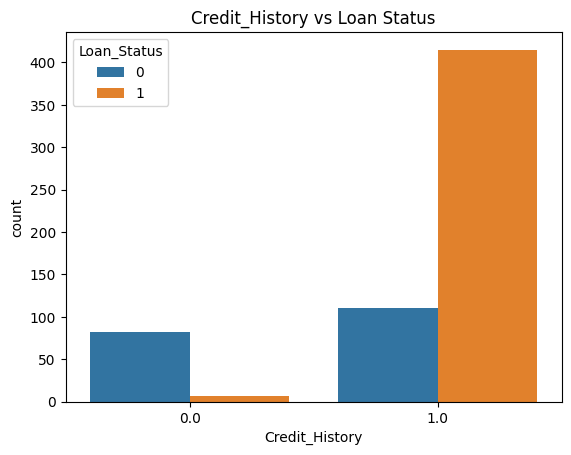

In [ ]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit_History vs Loan Status')
plt.show()

# Separate the Data


In [23]:
# split the data and Label

X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df['Loan_Status']

In [ ]:
# Split the data into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)



In [25]:
# # Train the model
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [26]:
# # Predict the test data
y_pred = model.predict(X_test)
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8130081300813008


In [30]:
# use RandomForest model and also use cross validation for better performance
# use Hyperparameter tuning for better performance
# use GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rfc1 = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rfc1, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Cross validation
from sklearn.model_selection import cross_val_score

rfc2 = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
# cv is cross validation
cv = cross_val_score(rfc2, X, y, cv=5)
print('Cross validation:', cv.mean())

# Fit the model on the training data
rfc2.fit(X_train, y_train)

#  Predict the test data
y_pred = rfc2.predict(X_test)
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))


Cross validation: 0.8094762095161936
Accuracy: 0.8048780487804879


In [41]:
# Predict the data
X_test = [1, 1, 0, 0, 0, 2600, 1911, 116, 360, 0, 2]  # Manually map the categorical values to numerical values
X_test = np.array(X_test).reshape(1, -1)
pred = rfc2.predict(X_test)
# Print the prediction result
print('Prediction:', pred)

Prediction: [0]


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
# Save the model use pickle file
import pickle
pickle.dump(rfc2, open('model.pkl', 'wb'))
# Load the model from pickle file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [45]:
# use model to predict 
X_test = [0, 0, 2, 1, 1, 3750, 1991, 116, 360, 1, 2]
X_test = np.array(X_test).reshape(1, -1)
pred = model.predict(X_test)
print('Prediction:', pred)

Prediction: [1]


C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
